In [222]:
# Package specific
import set_sys_path
from classy.model.data.read import Reader

# Data wranglers
import numpy as np
import pandas as pd

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reporting and testing
from sklearn import metrics
from sklearn.model_selection import (
    cross_validate,
    cross_val_predict
)
import scikitplot as skplt
from ann_visualizer.visualize import ann_viz


### Loading the dataset

In [2]:
reader = Reader()
dataset = reader.load_data("dataframe_with_class_attribute")
dataset.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
2181,17,17,17,18,19,19,19,19,19,19,...,14,14,15,15,15,14,14,14,15,5
12078,11,12,12,13,13,13,13,12,12,12,...,16,15,14,14,15,15,15,15,15,38
5713,169,169,171,170,168,168,169,168,169,167,...,140,142,143,143,142,143,144,142,144,12
3728,97,97,100,108,120,136,153,166,177,204,...,68,68,68,67,68,67,67,69,69,11
10092,72,69,66,68,68,69,72,72,71,70,...,50,50,47,44,45,46,49,42,35,32
9293,146,200,251,244,250,231,229,243,241,235,...,255,255,223,70,61,57,60,62,62,14
8146,56,62,62,68,78,89,99,80,63,57,...,120,116,110,95,81,72,67,65,76,13
6703,23,35,46,33,27,25,22,24,25,28,...,24,20,21,19,23,26,31,36,35,12
5061,253,254,254,254,254,254,254,253,253,253,...,43,49,151,244,247,249,249,117,53,12
9694,71,97,132,139,136,143,125,120,113,111,...,138,170,108,60,43,41,42,41,40,14


I'm using the original image labels. Below is a mappaging of their numeric and nominal labels

In [3]:
labels_mapping = (
    ("speed_limit_60", 3),
    ("speed_limit_80", 5),
    ("speed_limit_80_lifted", 6),
    ("right_of_way_crossing", 11),
    ("right_of_way_general", 12),
    ("give_way", 13),
    ("stop", 14),
    ("no_speed_limit_general", 32),
    ("turn_right_down", 38),
    ("turn_left_down", 39),
)

Seperate the labels and instances (y and X) into numpy arrays.

In [4]:
# Labels
labels = dataset['label'].values
# Instances and features
instances_and_features = dataset.iloc[:, :-1].values

print("Labels shape: ", labels.shape)
print("Instances and Features shape: ", instances_and_features.shape)

Labels shape:  (12660,)
Instances and Features shape:  (12660, 2304)


### Data Preparation

Both the linear classifier work best with the data set to between 0 and 1. For this we shall use scikit-learn's MinMaxScaller.

In [5]:
scaler = MinMaxScaler()
scaler.fit(instances_and_features)
instances_and_features = scaler.transform(instances_and_features)
pd.DataFrame(instances_and_features).describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,...,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000
mean,0.341104,0.338542,0.341324,0.338833,0.339795,0.340773,0.341819,0.343082,0.346266,0.344479,...,0.265556,0.263243,0.262648,0.260965,0.260258,0.253991,0.250359,0.247859,0.247932,0.251136
std,0.318127,0.319977,0.319265,0.320869,0.321117,0.321615,0.322356,0.322917,0.321757,0.323121,...,0.263628,0.262319,0.262993,0.263653,0.260438,0.258349,0.254266,0.251759,0.252817,0.253157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096000,0.092369,0.096000,0.088353,0.088353,0.088353,0.088353,0.088353,0.092000,0.092369,...,0.080321,0.076305,0.076305,0.076305,0.080000,0.072289,0.072289,0.072289,0.072289,0.076000
50%,0.200000,0.200803,0.200000,0.196787,0.200803,0.200803,0.200803,0.200803,0.208000,0.204819,...,0.164659,0.164659,0.164659,0.160643,0.160000,0.152610,0.152610,0.152610,0.148594,0.152000
75%,0.524000,0.522088,0.520000,0.522088,0.526104,0.526104,0.538153,0.538153,0.540000,0.538153,...,0.353414,0.349398,0.349398,0.345382,0.344000,0.337349,0.329317,0.325301,0.321285,0.328000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Note:</b> There is no dimensionality reduction as one of a Neural Network's strengths is to work out which features are important and which are not.

# Linear Classifier

The recommended linear classifier in scikit-learn when we have less than 100,0000 instances is Stochastic Gradient Descent classifier (SGDClassifier):

<img src="https://scikit-learn.org/stable/_static/ml_map.png" />

So let's go ahead and use it with a Logistic Regression.

## Logistic Regression

### With 10-fold cross valication

Here we use the full data with 10-fold cross valiadation. Already we have our X being instances_and_features and our y being labels.

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
logistic_regression = SGDClassifier(
    loss='log', # Logistic regression
    penalty='l2', # L2 regularization
    random_state=0, # Deterministic results
    n_jobs=4,  # Let's use all 4 CPU cores
)
# This will run for 1000 epochs unless there is no improvement for 5 epochs before this

In [14]:
# The 10 fold cross validation
cv_results = cross_validate(
    logistic_regression,
    instances_and_features, labels,
    cv=10
)

In [11]:
cross_validation_results

{'fit_time': array([6.64187694, 6.61158919, 6.82012796, 7.70553398, 7.13616109,
        6.10733485, 7.46306419, 6.50241899, 6.47534609, 7.74774003]),
 'score_time': array([0.0092392 , 0.00625467, 0.00652599, 0.00628185, 0.00511074,
        0.00671482, 0.00665283, 0.00668383, 0.00646496, 0.00635099]),
 'test_score': array([0.88151659, 0.91548183, 0.94233807, 0.89336493, 0.92259084,
        0.90679305, 0.82780411, 0.89494471, 0.92022117, 0.89020537])}

In [36]:
# Predicted
cv_predicted = cross_val_predict(
    logistic_regression,
    instances_and_features, labels,
    cv=10,
)

# And predicted probabilities
cv_predicted_proba = cross_val_predict(
    logistic_regression,
    instances_and_features, labels,
    cv=10,
    method='predict_proba'
)


In [48]:
# What's the score?
metrics.accuracy_score(labels, cv_predicted)

0.8995260663507109

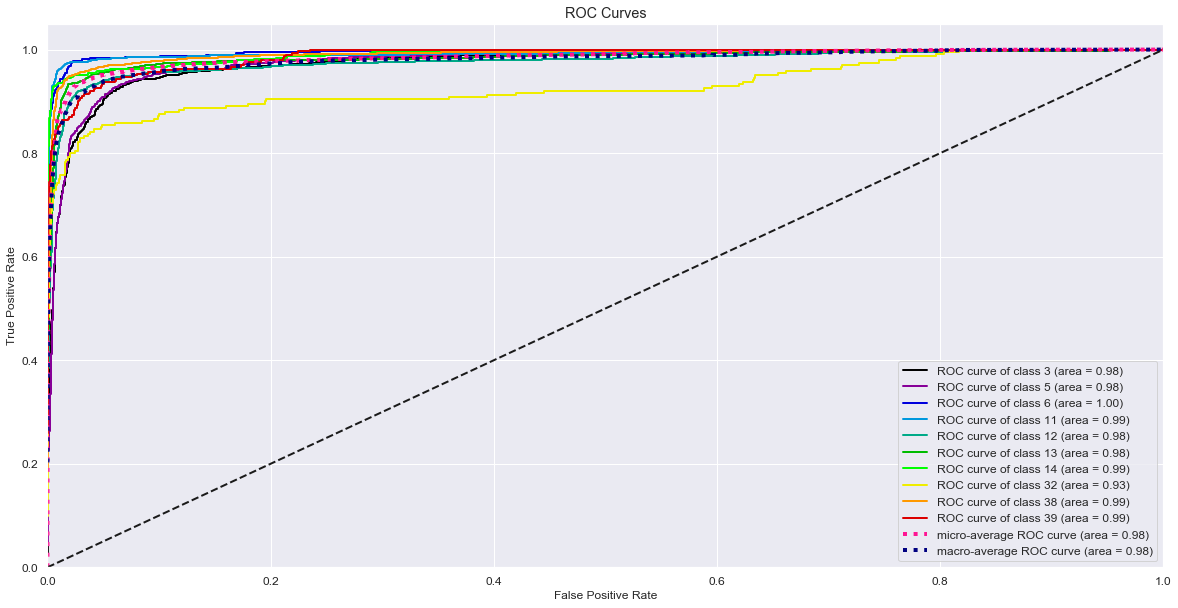

In [55]:
# Plot the ROC curves
skplt.metrics.plot_roc(labels, cv_predicted_proba, figsize=(20,10))

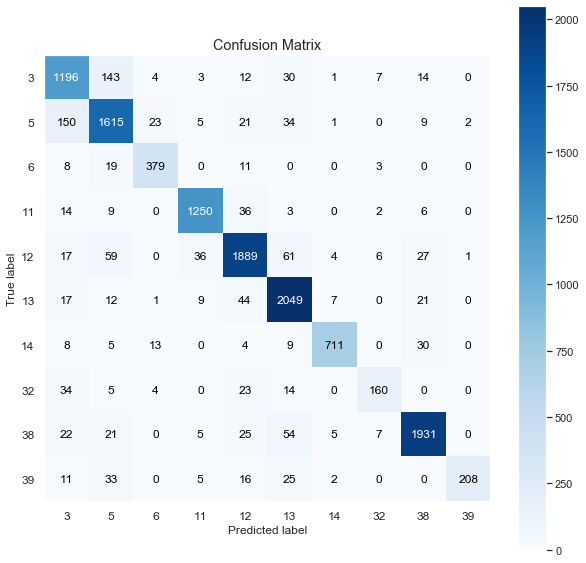

In [38]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(labels, cv_predicted, figsize=(10,10))

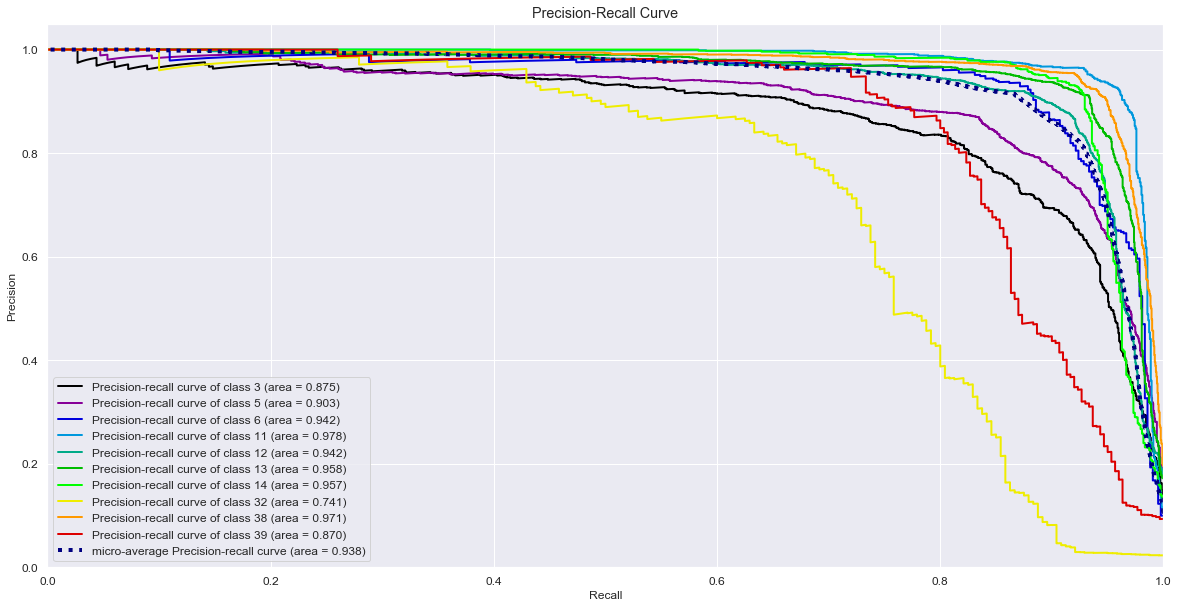

In [41]:
# Precision and recall
skplt.metrics.plot_precision_recall(labels, cv_predicted_proba, figsize=(20,10))

### With 70% training and 30% testing data split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    labels,
    test_size=0.3, # 70% training, 30% testing
    stratify=labels # Stratified
)

In [44]:
logistic_regression.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=4, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [51]:
predicted = logistic_regression.predict(X_test)
predicted_probas = logistic_regression.predict_proba(X_test)

In [47]:
# What's the accuracy score?
metrics.accuracy_score(y_test, predicted)

0.9476040021063717

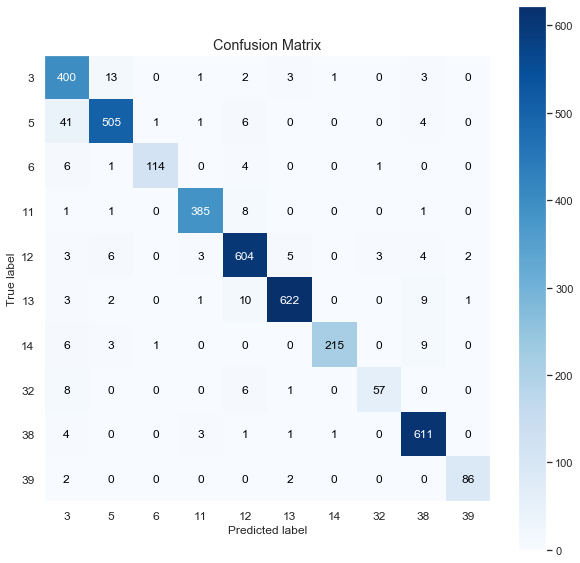

In [50]:
# Confusion matrix?
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(10,10))

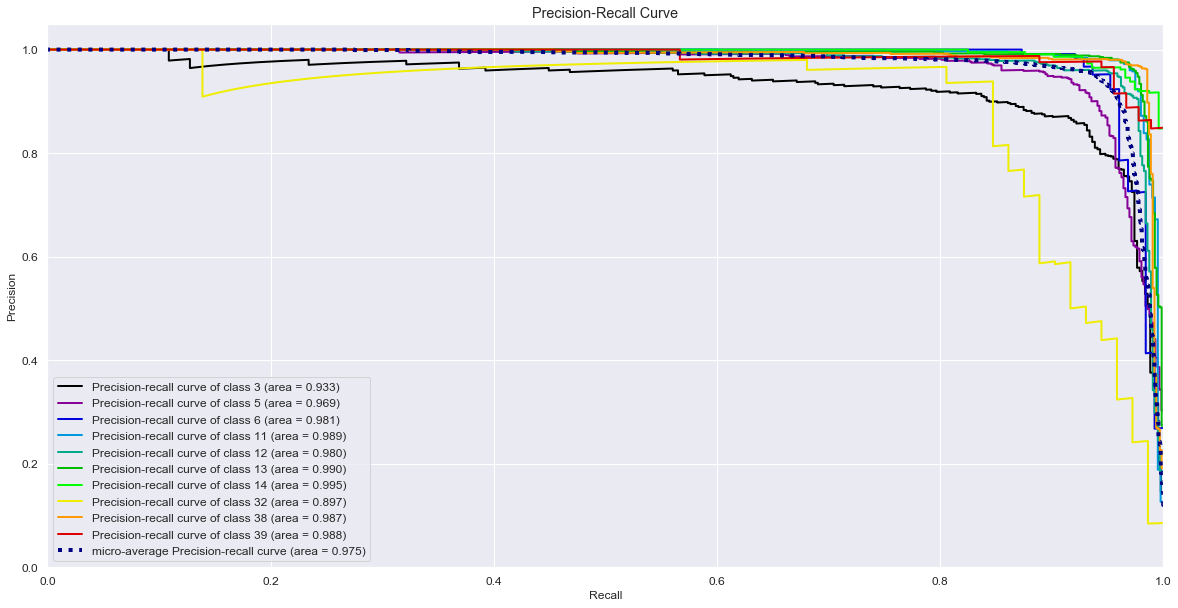

In [54]:
# Precision Recall Curves?
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize=(20,10))

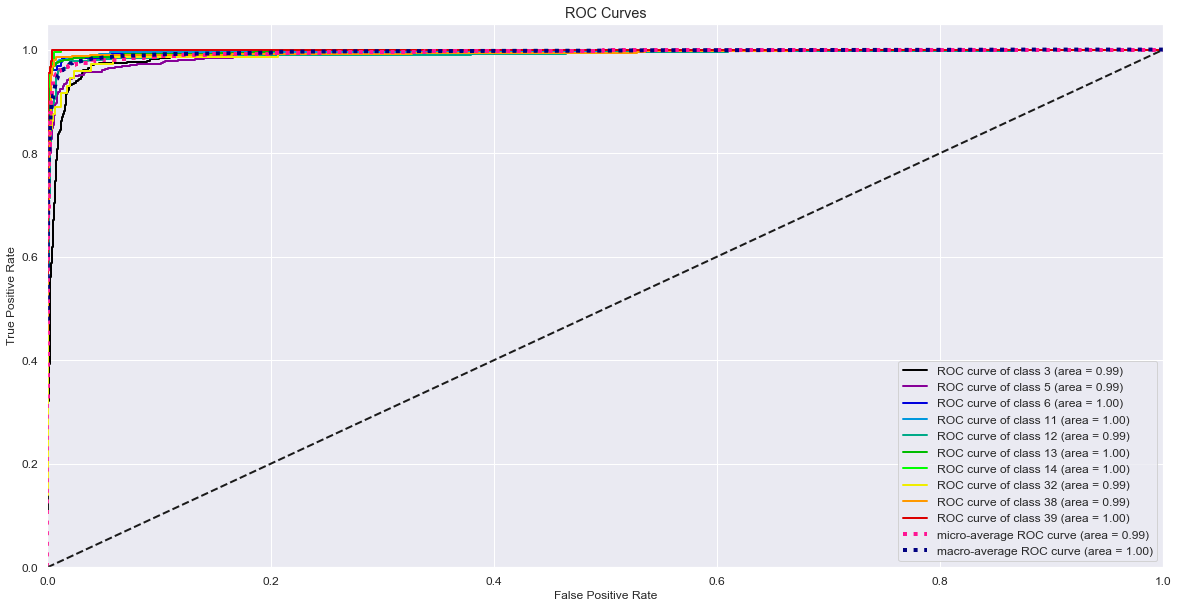

In [57]:
# ROC curves
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(20,10))

### With 30% training and 70% testing data split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    labels,
    test_size=0.7, # 30% training, 70% testing
    stratify=labels # Stratified
)

In [59]:
logistic_regression.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=4, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [60]:
predicted = logistic_regression.predict(X_test)
predicted_probas = logistic_regression.predict_proba(X_test)

In [61]:
# What's the accuracy score?
metrics.accuracy_score(y_test, predicted)

0.9355675919656963

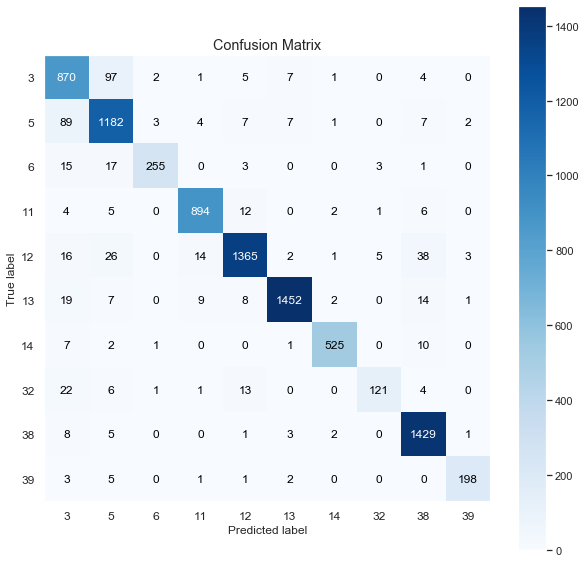

In [62]:
# Confusion matrix?
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(10,10))

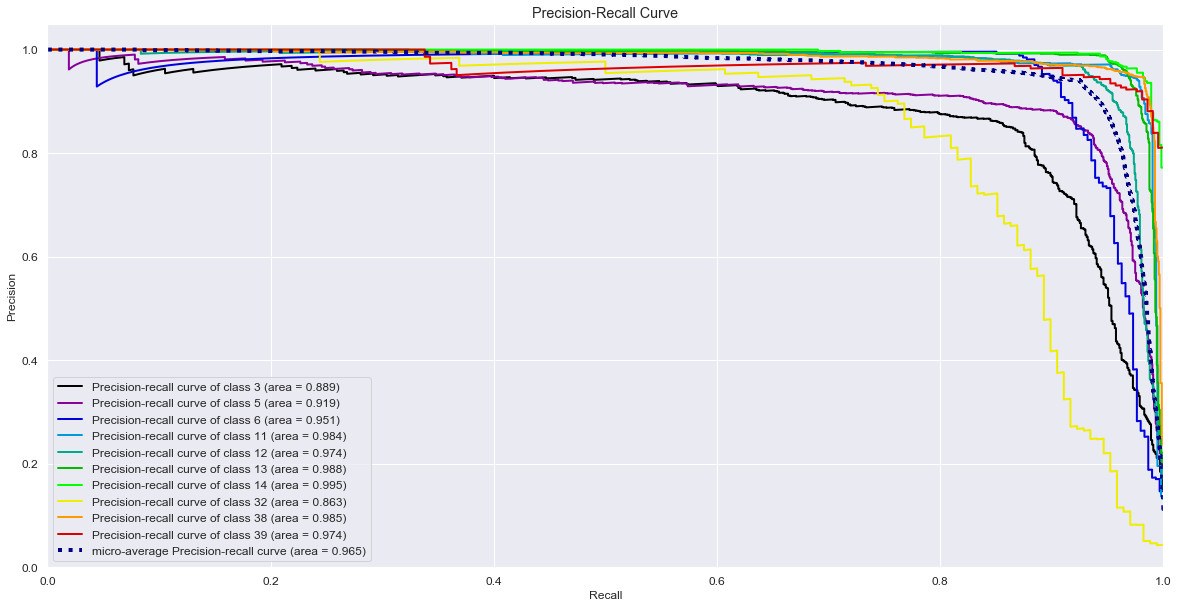

In [63]:
# Precision Recall Curves?
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize=(20,10))

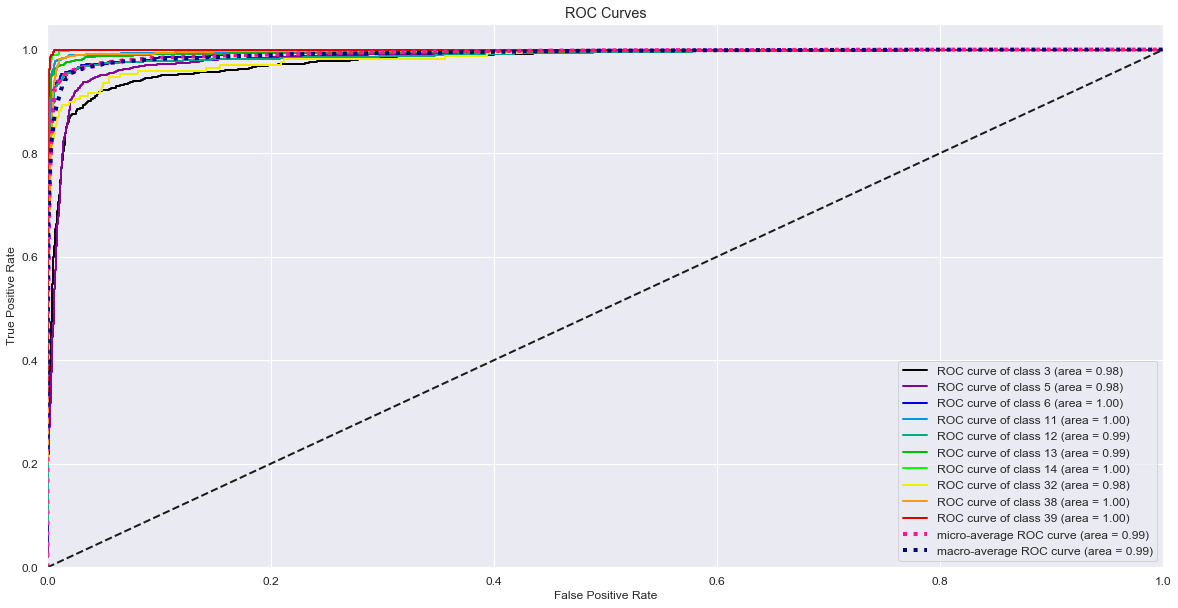

In [64]:
# ROC curves?
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(20,10))

# Multi-Layer Perceptron

## Finding the best one ***|||

We shall use the mean accuracy score to determin the best one. One with highest score wins.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    labels,
    test_size=0.3, # 70% training, 30% testing
    stratify=labels # Stratified
)

In [123]:
mlp2 = MLPClassifier(
    hidden_layer_sizes=(10, ), # one hidden layer, 10 neurons
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=200, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp2.out_activation_ = "softmax" # Multiclass classification

In [124]:
mlp2.fit(X_train, y_train)

/Users/timkofu/.local/share/virtualenvs/F21DLCW-Y6aQsTGC/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [125]:
mlp2.score(X_test, y_test)

0.9386519220642443

Let's try two layers of 10 neurons each

In [126]:
mlp3 = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=200, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp3.out_activation_ = "softmax" # Multiclass classification

In [127]:
mlp3.fit(X_train, y_train)

/Users/timkofu/.local/share/virtualenvs/F21DLCW-Y6aQsTGC/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [128]:
mlp3.score(X_test, y_test)

0.43970510795155343

Much worse. I'll try 1000 epochs with 1 hidden layer of 128 neurons

In [129]:
mlp4 = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=1000, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp4.out_activation_ = "softmax" # Multiclass classification

In [130]:
mlp4.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [131]:
mlp4.score(X_test, y_test)

0.9691943127962085

Is it the layers or the epochs? Adding another 128 neuron layer to test.

In [132]:
mlp5 = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=1000, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp5.out_activation_ = "softmax" # Multiclass classification

In [133]:
mlp5.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [134]:
mlp5.score(X_test, y_test)

0.965771458662454

One more layer

In [135]:
mlp6 = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128),
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=1000, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp6.out_activation_ = "softmax" # Multiclass classification

In [136]:
mlp6.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [137]:
mlp6.score(X_test, y_test)

0.9710373880989994

One more layer half the size of the others would help?

In [153]:
mlp7 = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128, 64),
    activation='relu', # Zero if not class, something else if class
    random_state=0, # We like determinism
    solver='adam', # Solver for weight optimization
    max_iter=1000, # Epochs
    learning_rate_init=0.001, # Step size
    # Sets the out activation function automatically based on number of classes
)
mlp7.out_activation_ = "softmax" # Multiclass classification

In [154]:
mlp7.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [155]:
mlp7.score(X_test, y_test)

0.9776197998946814

It did; 97% accuracy.

So it seems an NN with 4 hidden layers, first three with 128 neurons and last one with 64 using ReLu in the hidden layers and softmax for the output layer is a good classifier for this data. We shall use it henceforth.

## ***

In [157]:
goldmaster_nn = mlp7

## *** |||

## With 10-fold cross validation

In [158]:
# The 10 fold cross validation
cv_results = cross_validate(
    goldmaster_nn,
    instances_and_features, labels,
    cv=10
)

In [160]:
cv_results['test_score']

array([0.8657188 , 0.90205371, 0.92338073, 0.88862559, 0.93838863,
       0.94233807, 0.94154818, 0.88546603, 0.94312796, 0.92575039])

In [166]:
print(f"The best accuracy score is: {cv_results['test_score'].max()}")

The best accuracy score is: 0.943127962085308


Did not perform as well as the 70-30 split, with the best score being 94% accuracy.

In [162]:
# Predicted
cv_predicted = cross_val_predict(
    goldmaster_nn,
    instances_and_features, labels,
    cv=10,
)

# And predicted probabilities
cv_predicted_proba = cross_val_predict(
    goldmaster_nn,
    instances_and_features, labels,
    cv=10,
    method='predict_proba'
)

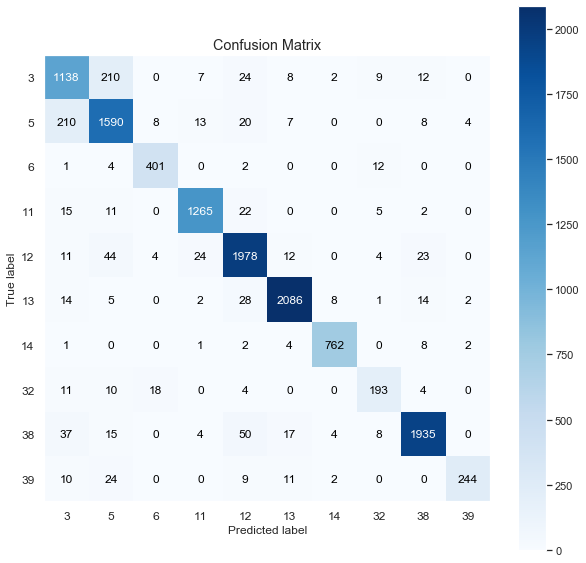

In [163]:
# Confusion matrix?
skplt.metrics.plot_confusion_matrix(labels, cv_predicted, figsize=(10,10))

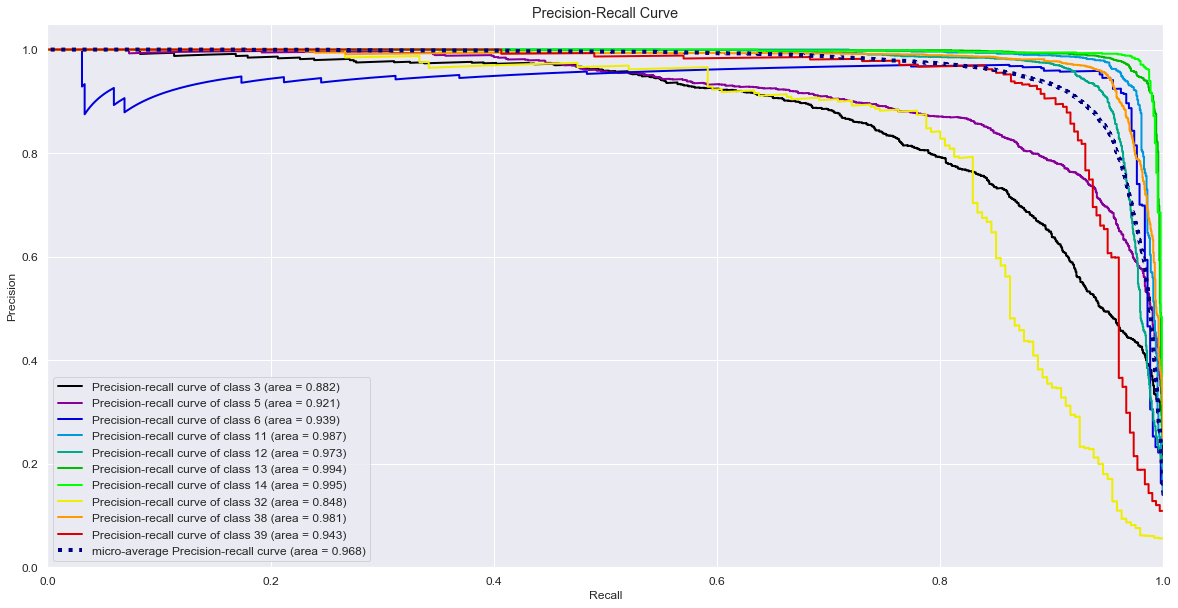

In [164]:
# Precision Recall Curves?
skplt.metrics.plot_precision_recall(labels, cv_predicted_proba, figsize=(20,10))

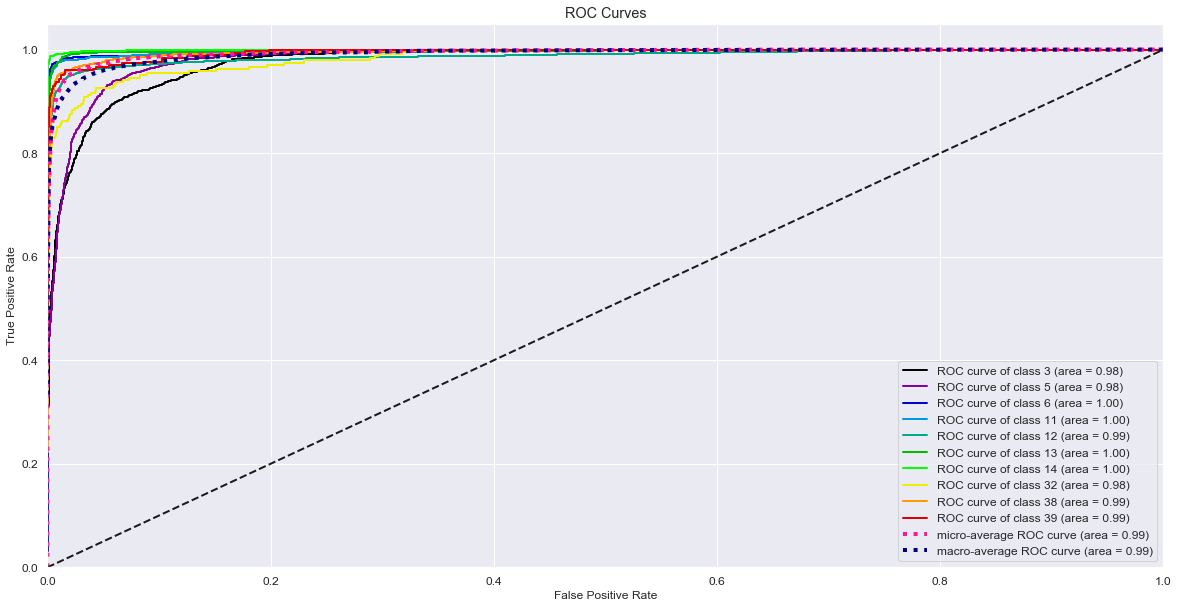

In [168]:
# ROC curves?
skplt.metrics.plot_roc(labels, cv_predicted_proba, figsize=(20,10))

### With 70% training and 30% testing data stratified split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    labels,
    test_size=0.3, # 70% training, 30% testing
    stratify=labels # Stratified
)

In [170]:
goldmaster_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [172]:
goldmaster_nn.score(X_test, y_test)

0.9805160610847815

In [174]:
predicted = goldmaster_nn.predict(X_test)
predicted_probas = goldmaster_nn.predict_proba(X_test)

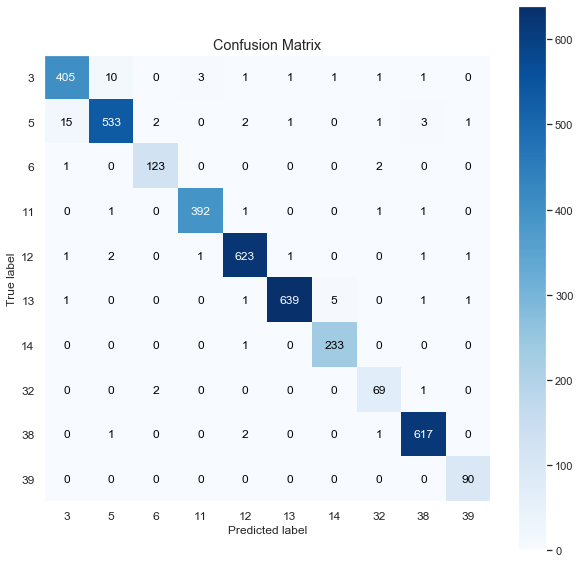

In [176]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(10,10))

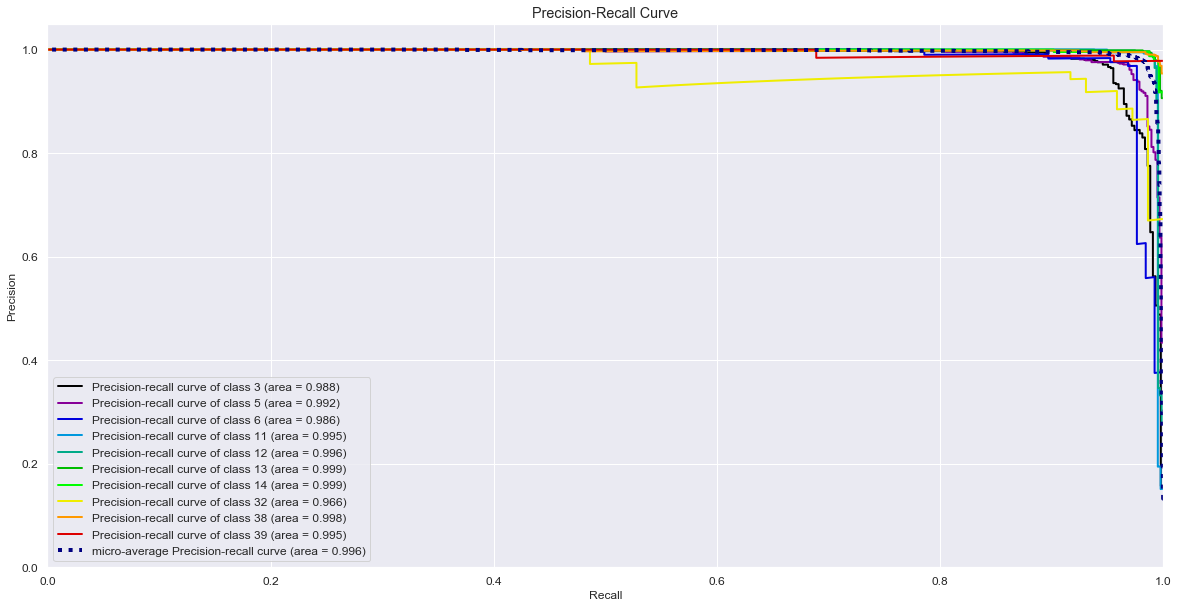

In [178]:
# Precision Recall Curves
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize=(20,10))

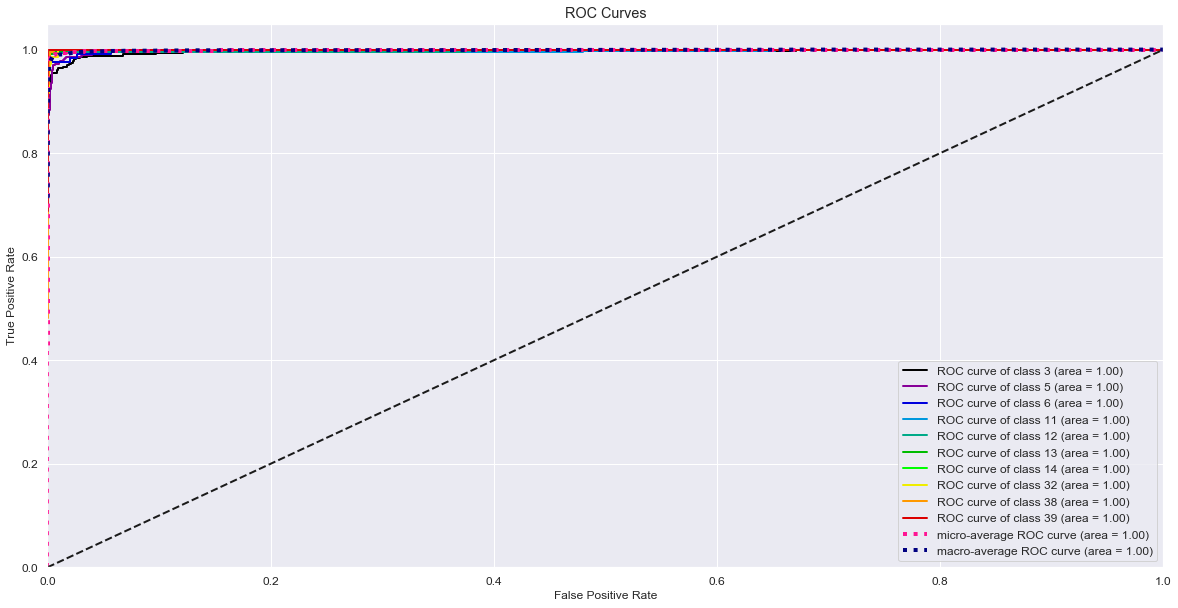

In [179]:
# ROC curves
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(20,10))

### With 30% training and 70% testing data stratified split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    labels,
    test_size=0.7, # 30% training, 70% testing
    stratify=labels # Stratified
)

In [181]:
goldmaster_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [182]:
goldmaster_nn.score(X_test, y_test)

0.9474159331979237

In [183]:
predicted = goldmaster_nn.predict(X_test)
predicted_probas = goldmaster_nn.predict_proba(X_test)

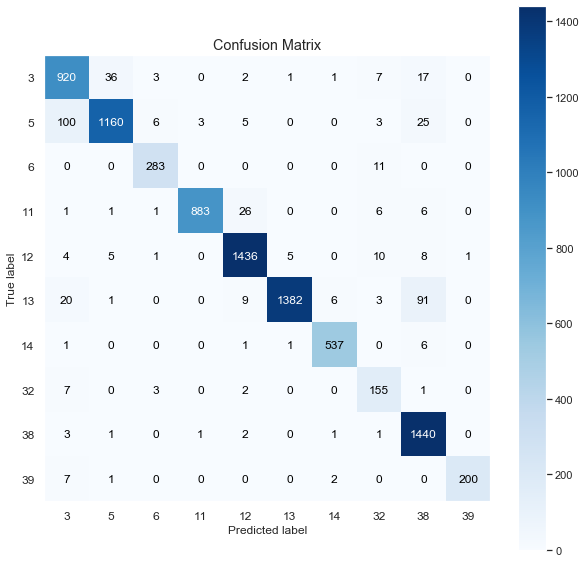

In [184]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(10,10))

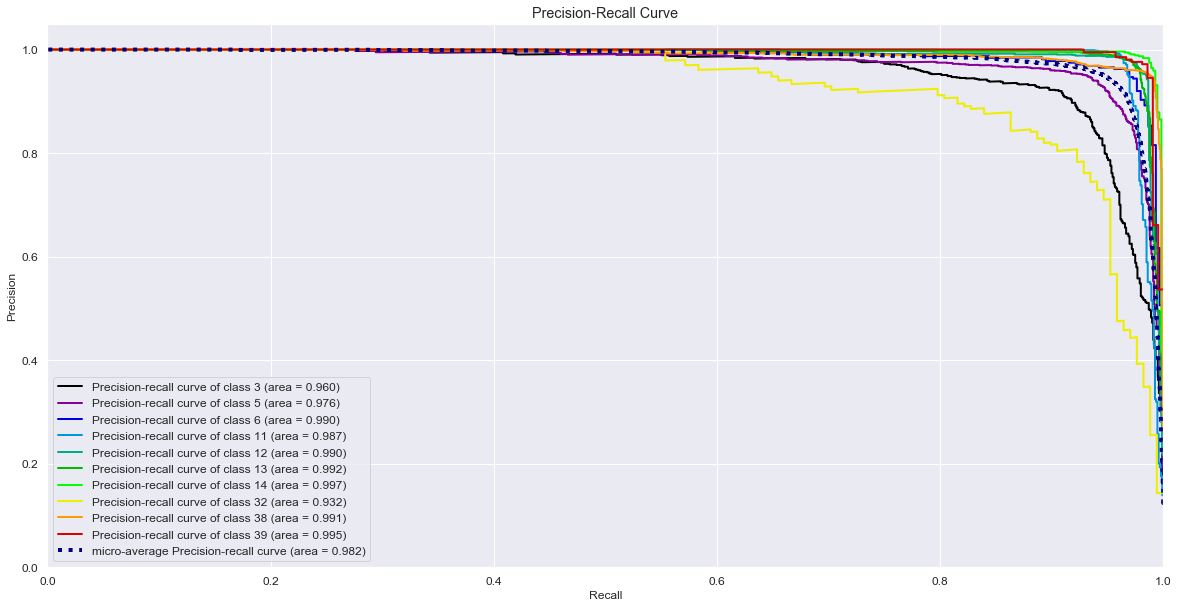

In [185]:
# Precision Recall Curves
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize=(20,10))

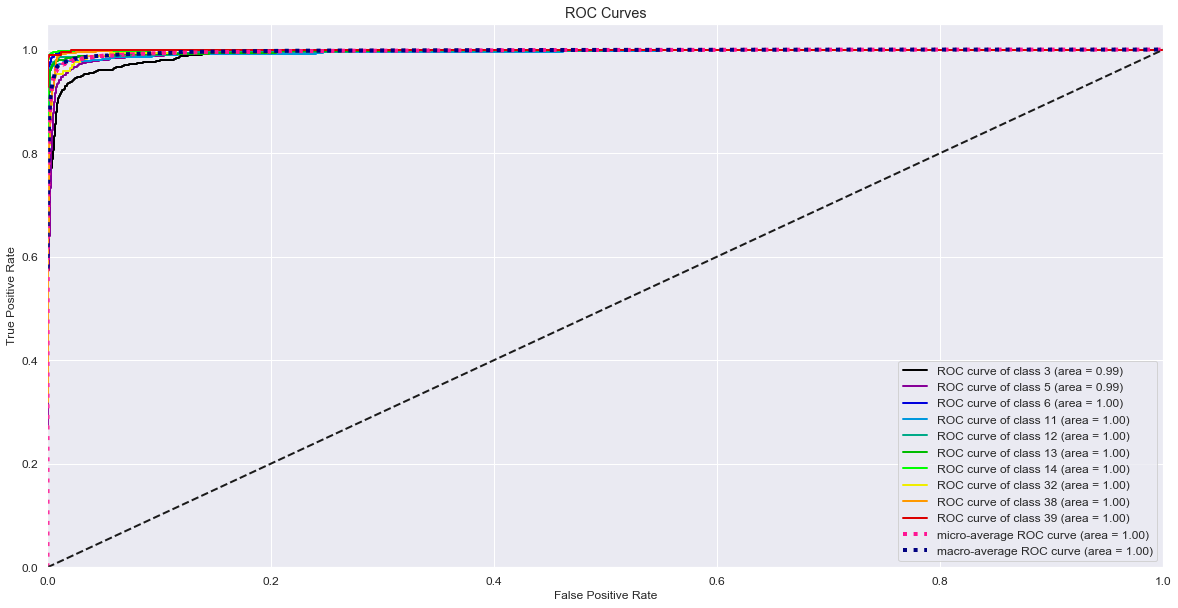

In [186]:
# ROC curves
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(20,10))

## How does Tensorflow compare to scikit-learn?

First we make a keras model and make sure it's performing the same

In [191]:
keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [192]:
keras_model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [203]:
# Convert the labels from 0-9
def convert_to_zero_to_nine(in_num):
    if in_num == 3:
        return 0
    elif in_num == 5:
        return 1
    elif in_num == 6:
        return 2
    elif in_num == 11:
        return 3
    elif in_num == 12:
        return 4
    elif in_num == 13:
        return 5
    elif in_num == 14:
        return 6
    elif in_num == 32:
        return 7
    elif in_num == 38:
        return 8
    elif in_num == 39:
        return 9
c2n = np.vectorize(convert_to_zero_to_nine)

In [206]:
converted_labels = c2n(labels)

In [207]:
# Do the proper train-test split
X_train, X_test, y_train, y_test = train_test_split(
    instances_and_features,
    converted_labels,
    test_size=0.3, # 70% training, 30% testing
    stratify=labels # Stratified
)

In [208]:
# Train the model
keras_model.fit(X_train, y_train, epochs=1000)

Train on 8862 samples
Epoch 1/1000
8862/8862 [==============================] - 1s 85us/sample - loss: 1.1879 - accuracy: 0.6162
Epoch 2/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.4872 - accuracy: 0.8381
Epoch 3/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 0.3389 - accuracy: 0.8840
Epoch 4/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 0.2513 - accuracy: 0.9175
Epoch 5/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 0.2177 - accuracy: 0.9258
Epoch 6/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 0.2113 - accuracy: 0.9320
Epoch 7/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 0.1941 - accuracy: 0.9336
Epoch 8/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 0.1561 - accuracy: 0.9455
Epoch 9/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 0.1749 - accuracy: 0.9415
Epoch 10/1000
8

8862/8862 [==============================] - 1s 83us/sample - loss: 0.0314 - accuracy: 0.9914
Epoch 77/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 0.0067 - accuracy: 0.9979
Epoch 78/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 0.0539 - accuracy: 0.9841
Epoch 79/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 0.0155 - accuracy: 0.9954
Epoch 80/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 0.0063 - accuracy: 0.9980
Epoch 81/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 0.0098 - accuracy: 0.9973
Epoch 82/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 0.0709 - accuracy: 0.9791
Epoch 83/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 0.0207 - accuracy: 0.9936
Epoch 84/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0479 - accuracy: 0.9841
Epoch 85/1000
8862/8862 [=================

8862/8862 [==============================] - 1s 80us/sample - loss: 1.5765e-08 - accuracy: 1.0000
Epoch 150/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 1.3532e-08 - accuracy: 1.0000
Epoch 151/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.1663e-08 - accuracy: 1.0000
Epoch 152/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.0062e-08 - accuracy: 1.0000
Epoch 153/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 8.8512e-09 - accuracy: 1.0000
Epoch 154/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 7.5868e-09 - accuracy: 1.0000
Epoch 155/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 6.5913e-09 - accuracy: 1.0000
Epoch 156/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 5.8246e-09 - accuracy: 1.0000
Epoch 157/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 5.2731e-09 - accuracy: 1.000

8862/8862 [==============================] - 1s 83us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 222/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 4.0355e-11 - accuracy: 1.0000
Epoch 223/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 224/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 225/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 226/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 4.0355e-11 - accuracy: 1.0000
Epoch 227/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 228/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 229/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 4.0355e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 83us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 294/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 6.7259e-11 - accuracy: 1.0000
Epoch 295/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 9.4162e-11 - accuracy: 1.0000
Epoch 296/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 8.0710e-11 - accuracy: 1.0000
Epoch 297/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 9.4162e-11 - accuracy: 1.0000
Epoch 298/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 9.4162e-11 - accuracy: 1.0000
Epoch 299/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 1.8832e-10 - accuracy: 1.0000
Epoch 300/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 301/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 1.7487e-10 - accuracy: 1.000

8862/8862 [==============================] - 1s 84us/sample - loss: 3.2427e-07 - accuracy: 1.0000
Epoch 367/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 2.6973e-07 - accuracy: 1.0000
Epoch 368/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 2.3237e-07 - accuracy: 1.0000
Epoch 369/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 1.9712e-07 - accuracy: 1.0000
Epoch 370/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 1.6745e-07 - accuracy: 1.0000
Epoch 371/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 1.4608e-07 - accuracy: 1.0000
Epoch 372/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 1.2338e-07 - accuracy: 1.0000
Epoch 373/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 1.0508e-07 - accuracy: 1.0000
Epoch 374/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 9.0072e-08 - accuracy: 1.000

8862/8862 [==============================] - 1s 79us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 439/1000
8862/8862 [==============================] - 1s 78us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 440/1000
8862/8862 [==============================] - 1s 77us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 441/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 442/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 443/1000
8862/8862 [==============================] - 1s 78us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 444/1000
8862/8862 [==============================] - 1s 78us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 445/1000
8862/8862 [==============================] - 1s 78us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 446/1000
8862/8862 [==============================] - 1s 76us/sample - loss: 2.6903e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 80us/sample - loss: 8.7076e-05 - accuracy: 1.0000
Epoch 512/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 5.6586e-05 - accuracy: 1.0000
Epoch 513/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 3.7368e-05 - accuracy: 1.0000
Epoch 514/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 2.9046e-05 - accuracy: 1.0000
Epoch 515/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 2.3067e-05 - accuracy: 1.0000
Epoch 516/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.8368e-05 - accuracy: 1.0000
Epoch 517/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.5184e-05 - accuracy: 1.0000
Epoch 518/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.2070e-05 - accuracy: 1.0000
Epoch 519/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 1.0293e-05 - accuracy: 1.000

8862/8862 [==============================] - 1s 80us/sample - loss: 3.2284e-10 - accuracy: 1.0000
Epoch 584/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 2.4213e-10 - accuracy: 1.0000
Epoch 585/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 2.0178e-10 - accuracy: 1.0000
Epoch 586/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.4797e-10 - accuracy: 1.0000
Epoch 587/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.2107e-10 - accuracy: 1.0000
Epoch 588/1000
8862/8862 [==============================] - 1s 78us/sample - loss: 1.2107e-10 - accuracy: 1.0000
Epoch 589/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 1.0761e-10 - accuracy: 1.0000
Epoch 590/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 6.7259e-11 - accuracy: 1.0000
Epoch 591/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 4.0355e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 80us/sample - loss: 4.0355e-11 - accuracy: 1.0000
Epoch 656/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 657/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 658/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 659/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 660/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 4.0355e-11 - accuracy: 1.0000
Epoch 661/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 662/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 663/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 1.3452e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 82us/sample - loss: 2.8632e-05 - accuracy: 1.0000
Epoch 729/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 2.1810e-05 - accuracy: 1.0000
Epoch 730/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.7142e-05 - accuracy: 1.0000
Epoch 731/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.3556e-05 - accuracy: 1.0000
Epoch 732/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.0704e-05 - accuracy: 1.0000
Epoch 733/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 8.6517e-06 - accuracy: 1.0000
Epoch 734/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 7.0615e-06 - accuracy: 1.0000
Epoch 735/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 5.7000e-06 - accuracy: 1.0000
Epoch 736/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 4.6507e-06 - accuracy: 1.000

8862/8862 [==============================] - 1s 80us/sample - loss: 1.7487e-10 - accuracy: 1.0000
Epoch 801/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.8832e-10 - accuracy: 1.0000
Epoch 802/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 1.0761e-10 - accuracy: 1.0000
Epoch 803/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 1.2107e-10 - accuracy: 1.0000
Epoch 804/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 6.7259e-11 - accuracy: 1.0000
Epoch 805/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 1.0761e-10 - accuracy: 1.0000
Epoch 806/1000
8862/8862 [==============================] - 1s 80us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 807/1000
8862/8862 [==============================] - 1s 79us/sample - loss: 5.3807e-11 - accuracy: 1.0000
Epoch 808/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 2.6903e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 83us/sample - loss: 2.6903e-11 - accuracy: 1.0000
Epoch 873/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 874/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 875/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 4.0355e-11 - accuracy: 1.0000
Epoch 876/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 877/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 878/1000
8862/8862 [==============================] - 1s 83us/sample - loss: 1.3452e-11 - accuracy: 1.0000
Epoch 879/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 880/1000
8862/8862 [==============================] - 1s 84us/sample - loss: 5.3807e-11 - accuracy: 1.000

8862/8862 [==============================] - 1s 80us/sample - loss: 1.0835e-07 - accuracy: 1.0000
Epoch 946/1000
8862/8862 [==============================] - 1s 82us/sample - loss: 9.1040e-08 - accuracy: 1.0000
Epoch 947/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 7.4778e-08 - accuracy: 1.0000
Epoch 948/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 6.2550e-08 - accuracy: 1.0000
Epoch 949/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 5.2623e-08 - accuracy: 1.0000
Epoch 950/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 4.4377e-08 - accuracy: 1.0000
Epoch 951/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 3.7409e-08 - accuracy: 1.0000
Epoch 952/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 3.1934e-08 - accuracy: 1.0000
Epoch 953/1000
8862/8862 [==============================] - 1s 81us/sample - loss: 2.7710e-08 - accuracy: 1.000

In [227]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  295040    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  16512     
_________________________________________________________________
dense_3 (Dense)              multiple                  8256      
_________________________________________________________________
dense_4 (Dense)              multiple                  650       
Total params: 336,970
Trainable params: 336,970
Non-trainable params: 0
__________________________________________________

In [229]:
keras_model.evaluate(X_test, y_test)

3798/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.23337905579422016, 0.98841494]

98% accuracy.

In [210]:
predicted = keras_model.predict(X_test)
predicted_probas = keras_model.predict_proba(X_test)

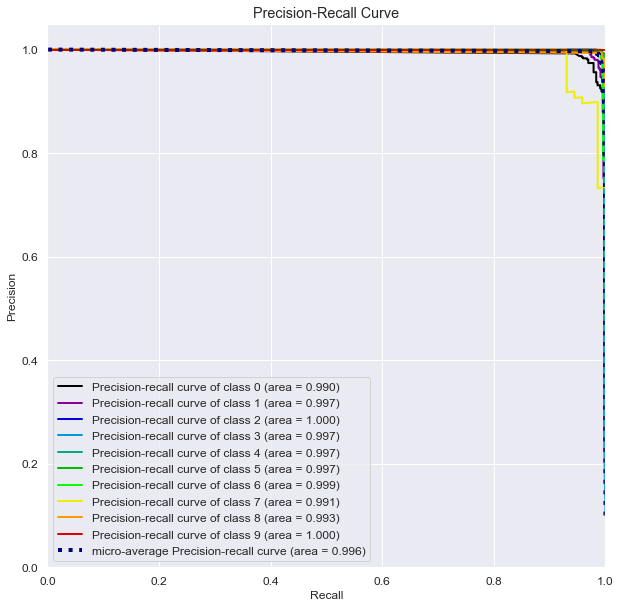

In [213]:
# Confusion matrix
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize=(10,10))

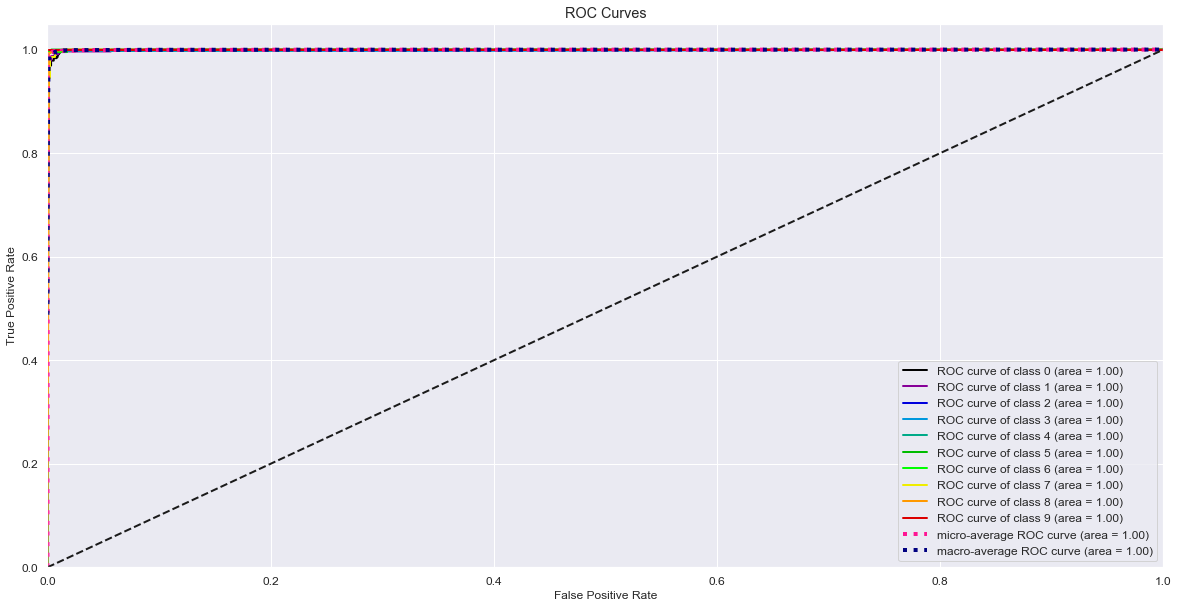

In [230]:
# ROC curves
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(20,10))